## Практическая работа №1: Краевая задача для уравнения II-го порядка.

Выполнил студент гр. 9382 Поплавский Иван, вариант 29.

### Цель работы

Цель работы
Научиться применять дифференциальные уравнения в различных областях, решать краевую задачу для уравнения II-го порядка путём многократного решения задачи Коши.

### Основные теоретические положения

Задача Коши подразумевает собой поиск частного решения уравнения $y = \phi(x)$ из числа общих, удовлетворяющих некоторым условиям. Общий вид задачи Коши:

\begin{cases}
   f(x, y, y', y'',...,y^{(n)}) = 0\\
   y(x_0) = y_0\\
   y'(x_0) = y_1\\
   y''(x_0) = y_2\\
   ...\\
   y^{(n-1)}(x_0) = y_{n-1}
 \end{cases}

**Краевая задача** - задача о нахождении решения заданного дифференциального уравнения удовлетворяющего краевым условиям в концах интервала.

## Постановка задачи

Дано дифференциальное уравнение:
$$y''=f(x,y), a < x < b \space\space (1)$$

и граничные условия

$$y(a) = y_a, y(b) = y_b \space\space (2)$$

Требуется найти решение задачи $(1)-(2)$ и построить его график.

Рассмотрим задачу Коши для уравнения $(1)$ с начальными условиями 

$$y(a) = y_a, y'(a) = h \space\space (3)$$

План решения основан на многократном решении задачи Коши $(1), (3)$.

Задача сводится к нахождению такого значения переменной $h$, при которой выполнено условие на правом конце отрезка, т.е. должно выполняться

$$y(b,h) = y_b$$





### Выполнение работы

$y'' = xy2^{-x}$

Краевые значения: 

$y(0) = 3$

$y(2) = -3$

Приведем к задаче Коши:

$
\begin{cases}
    y''= xy2^{-x} \\
    y(0)=3 \\
    y'(0)=h \\
\end{cases}
$

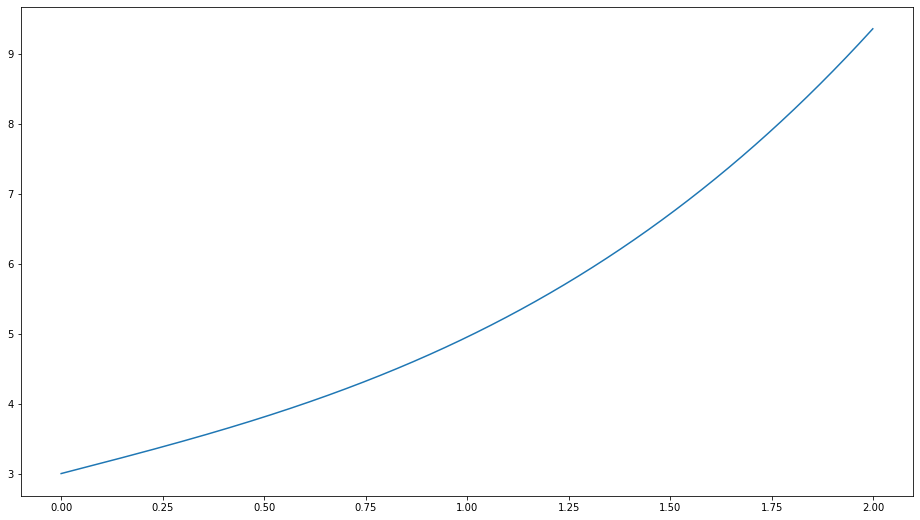

При h = 1.5, y(b, h0) = 9.353378137938236


In [17]:
from scipy import integrate 
import numpy as np
import matplotlib.pyplot as plt

h = 1.5

plt.figure(figsize=(16,9))
res = integrate.odeint(lambda Y, t: [Y[1], t*Y[0]*2**(-1*t)], [3, h], np.arange(0, 2, 0.001))
plt.plot(np.arange(0, 2, 0.001), res[:, 0])
plt.show()
print(f"При h = {h}, y(b, h0) = {res[-1, 0]}")

Выберем шаг $\Delta h = -0.2$ и решим задачу Коши несколько раз, пока y(b, h0) не станет < -3

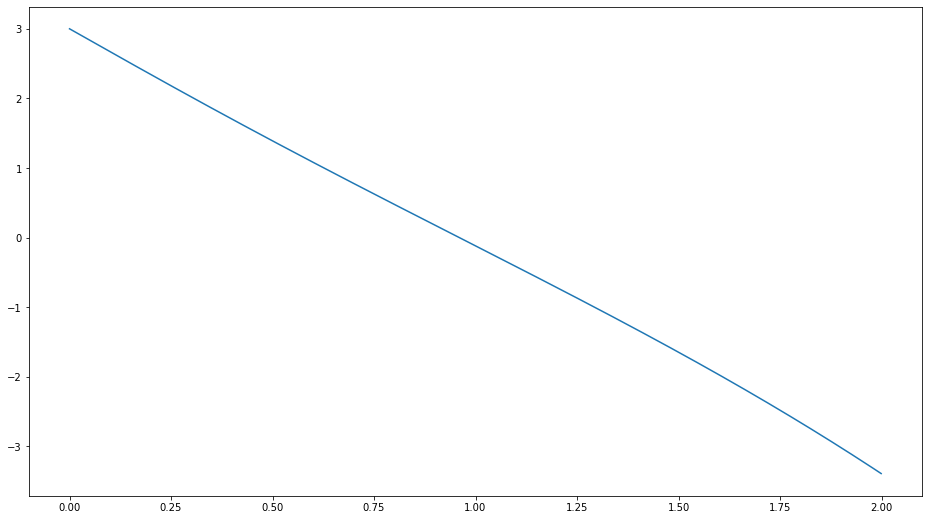

При h = -3.3000000000000007, y(b, h) = -3.392966617727592


In [26]:
h = 1.5
res = integrate.odeint(lambda Y, t: [Y[1], t*Y[0]*2**(-1*t)], [3, h], np.arange(0, 2, 0.001))
while(res[-1, 0] > -3):
    h -= 0.2
    res = integrate.odeint(lambda Y, t: [Y[1], t*Y[0]*2**(-1*t)], [3, h], np.arange(0, 2, 0.001))
    
plt.figure(figsize=(16,9))
plt.plot(np.arange(0, 2, 0.001), res[:, 0])
plt.show()
print(f"При h = {h}, y(b, h) = {res[-1, 0]}")

In [40]:
# Верхняя граница
res = integrate.odeint(lambda Y, t: [Y[1], t*Y[0]*2**(-1*t)], [3, -3.1], np.arange(0, 2, 0.001))
res[-1][0]

-2.861868926051933

Мы получили интервал -3.2 < h < -3.15, при котором y(b, h0) близко к -3 

Далее применяем процесс половинного деления к уравнению y(b, h0) пока $|y(b, h_{m}) - y(b, h_{m-1}))| < 0.001$, если задача не имеет решения, то остановим после 100 шагов

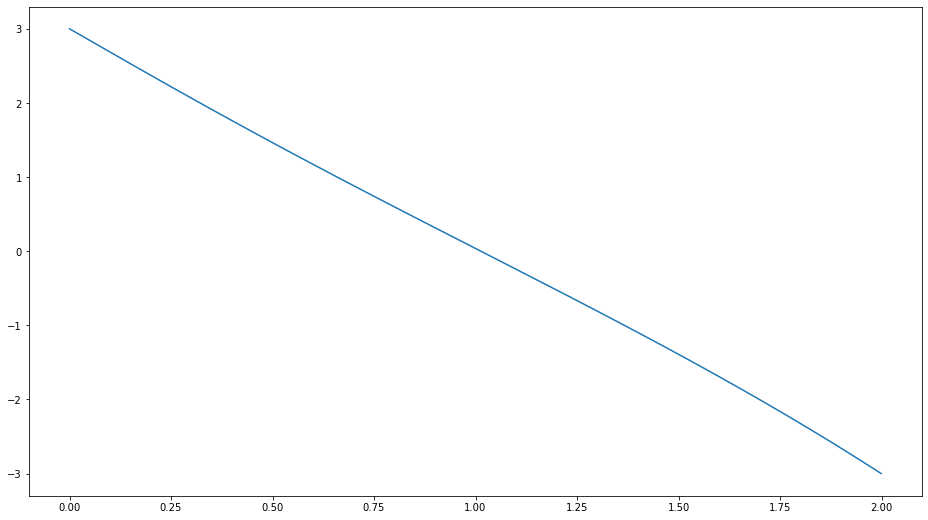

In [28]:
step = 0
upy = -3.392966617727592
ly = -2.861868926051933
uph = -3.1
lh = -3.3
while abs(upy - ly) >= 0.001 and step < 100:
    step += 1
    dh = (uph - lh)/2
    h = lh + dh
    res = integrate.odeint(lambda Y, t: [Y[1], t*Y[0]*2**(-1*t)], [3, h], np.arange(0, 2, 0.001))
    if(res[-1,0] > -3):
        uph = h
        upy = res[-1,0]
    else:
        lh = h
        ly = res[-1,0]

plt.figure(figsize=(16,9))
plt.plot(np.arange(0, 2, 0.001), res[:, 0])
plt.show()

In [39]:
print(f"Полученные границы h = [{lh}, {uph}]")
print(f"Решением задачи будет h = {h} и значение при нем = {res[-1, 0]}")

Полученные границы h = [-3.1521484375, -3.1519531250000004]
Решением задачи будет h = -3.1521484375 и значение при нем = -3.000348499963792


В ходе работы был рассмотрен на практике способ решения краевой задачи 2-го порядка путем многократного решения задачи Коши. Результат работы значение h = -3.1521484375